In [2]:
import os
import sys
ROOT_DIR = os.environ['ROOT_DIR']
sys.path.append(ROOT_DIR)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## compile data into dataframe

In [3]:
model_path = os.path.join(ROOT_DIR, 'data', 'product', 'best_exp', 'evaluation')
ckpts = os.listdir(model_path)
os.listdir(os.path.join(model_path, ckpts[0]))

['ckpt_100', 'ckpt_600', 'ckpt_1450', 'ckpt_800', 'ckpt_1300', 'ckpt_200', 'ckpt_650', 'ckpt_1150', 'ckpt_550', 'ckpt_1100', 'ckpt_1200', 'ckpt_400', 'ckpt_0', 'ckpt_350', 'ckpt_1500', 'ckpt_1050', 'ckpt_700', 'ckpt_900', 'ckpt_500', 'ckpt_1350', 'ckpt_450', 'ckpt_1400', 'ckpt_50', 'ckpt_1250', 'ckpt_850', 'ckpt_250', 'ckpt_750', 'ckpt_150', 'ckpt_1000', 'ckpt_950', 'ckpt_300']


['trial_20181219.001.npy']

In [ ]:
# Change None to your eval_id from list above
EVAL_ID = None

In [5]:
df = pd.DataFrame([], columns=['training_episode_ckpt', 'episode_score', 'eval_episode_id'])
for ckpt_id in ckpts:
    arr = np.load(os.path.join(model_path, ckpt_id, EVAL_ID))
    tmp_df = pd.DataFrame(arr, columns=['episode_score'])
    tmp_df['training_episode_ckpt'] = ckpt_id.split('_')[1]
    tmp_df['eval_episode_id'] = tmp_df.index.values
    df = df.append(tmp_df, sort=True, ignore_index=True)

df = df.astype(np.float32)

## Make Plot

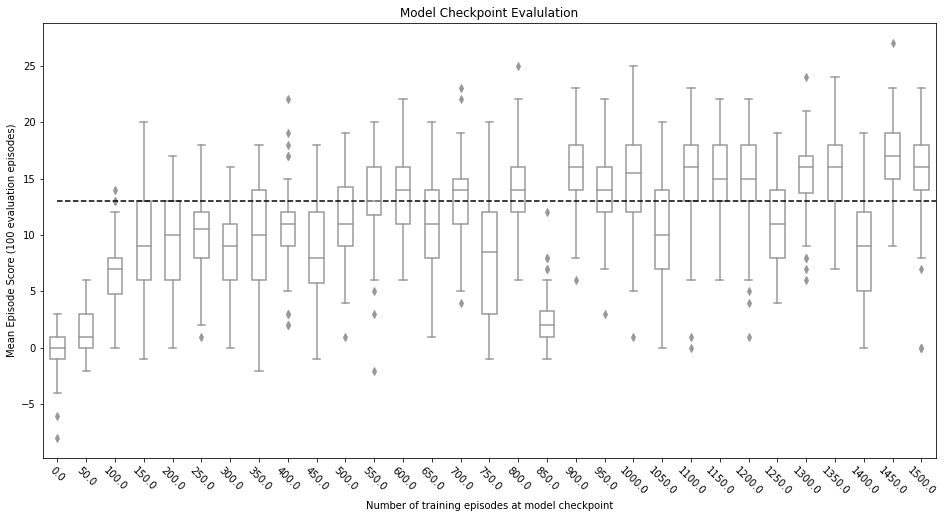

In [6]:
f, axarr = plt.subplots(1, figsize=(16, 8))
g = sns.boxplot(x="training_episode_ckpt", 
             y="episode_score",
#             hue=None,
            color='white',
             ax=axarr,
            width=0.5,
#             notch=True,
#              ci=99,
#              legend='full',
             data=df.sort_values(['training_episode_ckpt', 'eval_episode_id']))
g.set_xticklabels(axarr.get_xticklabels(), rotation=-45)
plt.title('Model Checkpoint Evalulation')
plt.ylabel('Mean Episode Score (100 evaluation episodes)')
plt.xlabel('Number of training episodes at model checkpoint')
plt.plot(np.linspace(0, 1500, 100), np.full([100], 13), linestyle='--', color='black')
plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


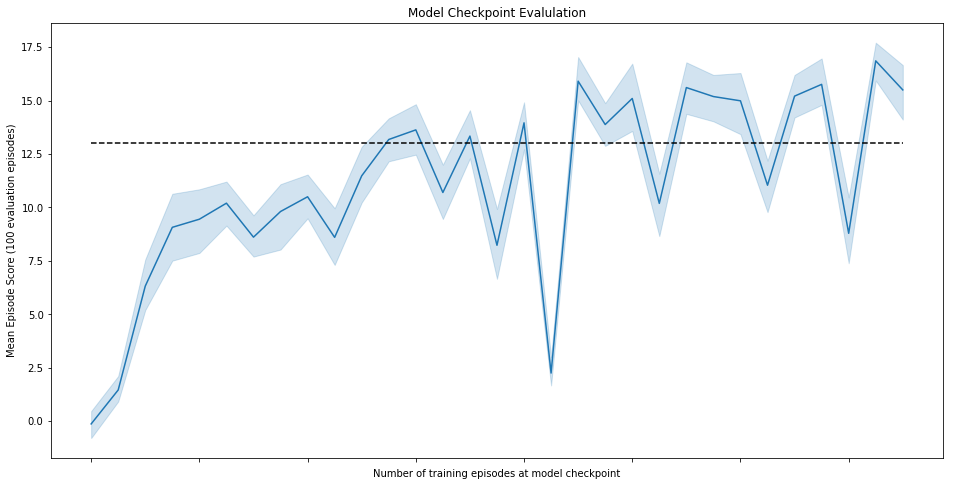

In [7]:
f, axarr = plt.subplots(1, figsize=(16, 8))
g = sns.lineplot(x="training_episode_ckpt", 
             y="episode_score",
#             hue=None,
#             color='white',
             ax=axarr,
#             width=0.5,
#             notch=True,
             ci=100,
#              legend='full',
             data=df.sort_values(['training_episode_ckpt', 'eval_episode_id']))
g.set_xticklabels(axarr.get_xticklabels(), rotation=-45)
plt.title('Model Checkpoint Evalulation')
plt.ylabel('Mean Episode Score (100 evaluation episodes)')
plt.xlabel('Number of training episodes at model checkpoint')
plt.plot(np.linspace(0, 1500, 100), np.full([100], 13), linestyle='--', color='black')
plt.show()